<a href="https://colab.research.google.com/github/shineloveyc/Doing_ML/blob/master/Chapter5_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data', header = None)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [0]:
import numpy as np

In [0]:
#compute the covariance
cov_mat = np.cov(X_train_std.T)
#using linalg.eig performed eigendecomposition, yield a vector and eigenvalues
eigen_vals , eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n {}'.format(eigen_vals))


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


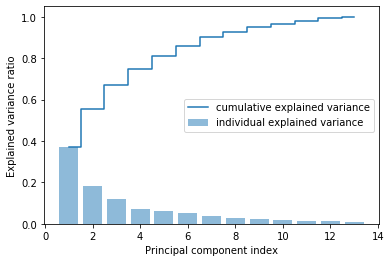

In [0]:
#plot variance explained by eigen vectors
tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center',
        label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid',
         label = 'cumulative explained variance')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.legend(loc = 'best')
plt.show()

In [0]:
#make a list of eigenvalue, eigenvector tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                for i in range(len(eigen_vals))]

#sort the tuples from high to low
eigen_pairs.sort(key = lambda k:k[0], reverse = True)

In [0]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
  cmap = ListedColormap(colors[:len(np.unique(y))])
# plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution)) 
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
  plt.xlim(xx1.min(), xx1.max()) 
  plt.ylim(xx2.min(), xx2.max())

# plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
              y=X[y == cl, 1], 
              alpha=0.6, c=cmap(idx), 
              edgecolor='black', 
              marker=markers[idx], 
              label=cl)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


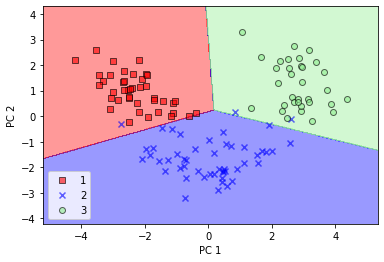

In [0]:
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()

In [0]:
#if we want to list the variance explained by each component
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio

AttributeError: ignored

# Implement PCA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

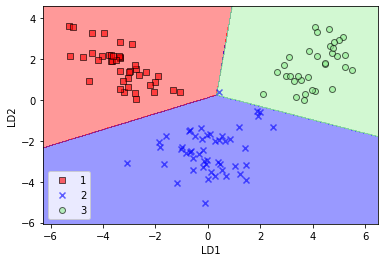

In [0]:
#build logistic model after transform
lr = LogisticRegression()
lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda, y_train,classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc = 'lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


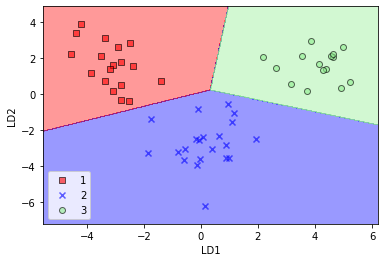

In [0]:
#check the reulst on test set
plot_decision_regions(X_test_lda,y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc = 'lower left')
plt.show()

The log reg is able to use only two dimension to make the prefect prediction

# Kernel for Non-linear Mapping

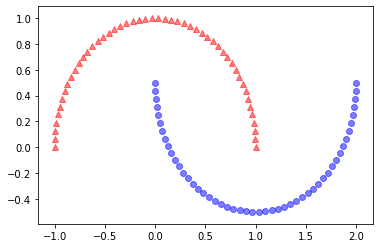

In [0]:
#seperate half-moon shapes
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state = 123)

plt.scatter(X[y==0,0], X[y==0,1],
            color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y==1,0], X[y==1,1],
            color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

In [0]:
from sklearn.decomposition import KernelPCA

In [0]:
X, y = make_moons(n_samples=100, random_state=123)

sk_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

X_train_skpca = sk_pca.fit_transform(X)

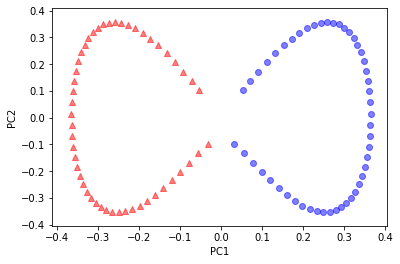

In [0]:
plt.scatter(X_train_skpca[y==0,0], X_train_skpca[y==0,1],
            color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X_train_skpca[y==1,0], X_train_skpca[y==1,1],
            color = 'blue', marker = 'o', alpha = 0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()